#Airline Passenger Satisfaction
Набор данных об удовлетворенности полетом пассажирами. Позволяет понять был ли удволетворен пассажир после полета, на основе данных о его полете и оценке им различных дополнительных сервисов (например качество еды, чистота в салоне итд).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('test.csv')
print('Размерность', df.shape)
df.head()

Размерность (25976, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [14]:
print("Столбцы:", df.columns.tolist())

Столбцы: ['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

#Простые вероятности

Вероятность быть удовлетвореным полетом

In [24]:
P_satisfied = (df['satisfaction'] == 'satisfied').mean()
print('P(satisfied) = '+ str(P_satisfied))

P(satisfied) = 0.4389821373575608


Вероятность принадлежать к классу

In [26]:
for cl in df['Class'].unique():
    P_class = (df['Class'] == cl).mean()
    print(f"P(class = {cl}) = {P_class}")

P(class = Eco) = 0.4451801663073606
P(class = Business) = 0.48102094240837695
P(class = Eco Plus) = 0.0737988912842624


Вероятность быть мужчиной или женщиной

In [27]:
for gender in df['Gender'].unique():
    P_gender = (df['Gender'] == gender).mean()
    print(f"P(gender = {gender}) = {P_gender}")

P(gender = Female) = 0.5070834616569141
P(gender = Male) = 0.4929165383430859


#Условные вероятности

Вероятность быть удовлетворенным, если пассажир был мужчиной

$$P_{male}(satisfied) = \frac{P(male \cdot satisfied)}{P(male)}$$

In [30]:
# Способ 1: по формуле
P_male = (df['Gender'] == 'Male').mean()
P_male_and_satisfied = ((df['satisfaction'] == 'satisfied') & (df['Gender'] == 'Male')).mean()

P_satisfied_if_male = P_male_and_satisfied / P_male
print(f"P(satisfied | male)= {P_satisfied_if_male}")

P(satisfied | male)= 0.4426741643236489


In [31]:
# Способ 2: через фильтр
male = df[df['Gender'] == 'Male']
P_satisfied_if_male_filter = (male['satisfaction'] == 'satisfied').mean()
print(f"P(satisfied | male) =  {P_satisfied_if_male_filter}")

P(satisfied | male) =  0.44267416432364887


Функция определения условных вероятностей

In [39]:
def conditional_probability(df, condition_col, target_col, target_val):
  for item in df[condition_col].unique():
    subset = df[df[condition_col] == item]
    if len(subset) == 0:
        return 0
    print(f"P(satisfied | {item}) = " + str((subset[target_col] == target_val).mean()))

Условные вероятности выживания

In [45]:
print('По полу:')
conditional_probability(df, 'Gender','satisfaction','satisfied')
print('По классу:')
conditional_probability(df, 'Class','satisfaction','satisfied')
print('По степени чистоты:')
conditional_probability(df, 'Cleanliness','satisfaction','satisfied')
print('По качеству еды:')
conditional_probability(df, 'Food and drink','satisfaction','satisfied')
print('По типу путешествия:')
conditional_probability(df, 'Type of Travel','satisfaction','satisfied')

По полу:
P(satisfied | Female) = 0.4353932584269663
P(satisfied | Male) = 0.44267416432364887
По классу:
P(satisfied | Eco) = 0.19387755102040816
P(satisfied | Business) = 0.6951580632252902
P(satisfied | Eco Plus) = 0.2477829942618675
По степени чистоты:
P(satisfied | 5) = 0.6270298585646935
P(satisfied | 2) = 0.21125345390605377
P(satisfied | 4) = 0.5350515463917526
P(satisfied | 3) = 0.4379225061830173
P(satisfied | 1) = 0.1999413661682791
P(satisfied | 0) = 0.0
По качеству еды:
P(satisfied | 3) = 0.40171095740808155
P(satisfied | 5) = 0.5582919914953933
P(satisfied | 2) = 0.3933271547729379
P(satisfied | 4) = 0.5291747259832367
P(satisfied | 1) = 0.19757311761045426
P(satisfied | 0) = 0.2
По типу путешествия:
P(satisfied | Business travel) = 0.5882026832243042
P(satisfied | Personal Travel) = 0.099899218946838


In [50]:
def conditional_probability(df, condition_col, condition_val, target_col, target_val='satisfied'):
    subset = df[df[condition_col] == condition_val]
    if len(subset) == 0:
        return 0
    return (subset[target_col] == target_val).mean()

#Полная вероятность

Формула полной вероятности для моего случая:
$$P(satisfied) = P(satisfied | male) \cdot P(male) + P(satisfied | female) \cdot P(female)$$

In [52]:
total_prob = 0
prob_details = []

for gender in df['Gender'].unique():
    P_gender = (df['Gender'] == gender).mean()
    P_satisfied_if_gender = conditional_probability(df, 'Gender', gender, 'satisfaction')

    contribution = P_satisfied_if_gender * P_gender
    total_prob += contribution

    prob_details.append({
        'gender': gender,
        'P(gender)': P_gender,
        'P(satisfied | gender)': P_satisfied_if_gender,
        'Вклад': contribution
    })

prob_df = pd.DataFrame(prob_details)
print(prob_df.round(3))

print(f"Вероятность быть удволетворенным по формуле полной вероятности: {total_prob}")
print(f"Вероятность быть удволетворенным из данных: {(df['satisfaction']=='satisfied').mean()}")

   gender  P(gender)  P(satisfied | gender)  Вклад
0  Female      0.507                  0.435  0.221
1    Male      0.493                  0.443  0.218
Вероятность быть удволетворенным по формуле полной вероятности: 0.4389821373575608
Вероятность быть удволетворенным из данных: 0.4389821373575608


#Формула Байеса

Вероятность что пассажир принадлежит к классу, при условии что он удовлетворен
$$ P_{satisfied}(class = i) = \frac{P(class=i) \cdot P_{class=i}(satisfied)}{P(satisfied)} $$

In [54]:
P_s = (df['satisfaction']=='satisfied').mean()

bayes_results = []

for cl in df['Class'].unique():
    P_A = (df['Class'] == cl).mean()
    P_B_given_A = conditional_probability(df, 'Class', cl, 'satisfaction')
    P_A_given_B = (P_B_given_A * P_A) / P_s
    bayes_results.append({
        'class': cl,
        'P(class)': P_A,
        'P(satisfied | class)': P_B_given_A,
        'P(class | satisfied)': P_A_given_B
    })

bayes_df = pd.DataFrame(bayes_results)
print("Результаты применения теоремы Байеса:")
print(bayes_df.round(3))

Результаты применения теоремы Байеса:
      class  P(class)  P(satisfied | class)  P(class | satisfied)
0       Eco     0.445                 0.194                 0.197
1  Business     0.481                 0.695                 0.762
2  Eco Plus     0.074                 0.248                 0.042


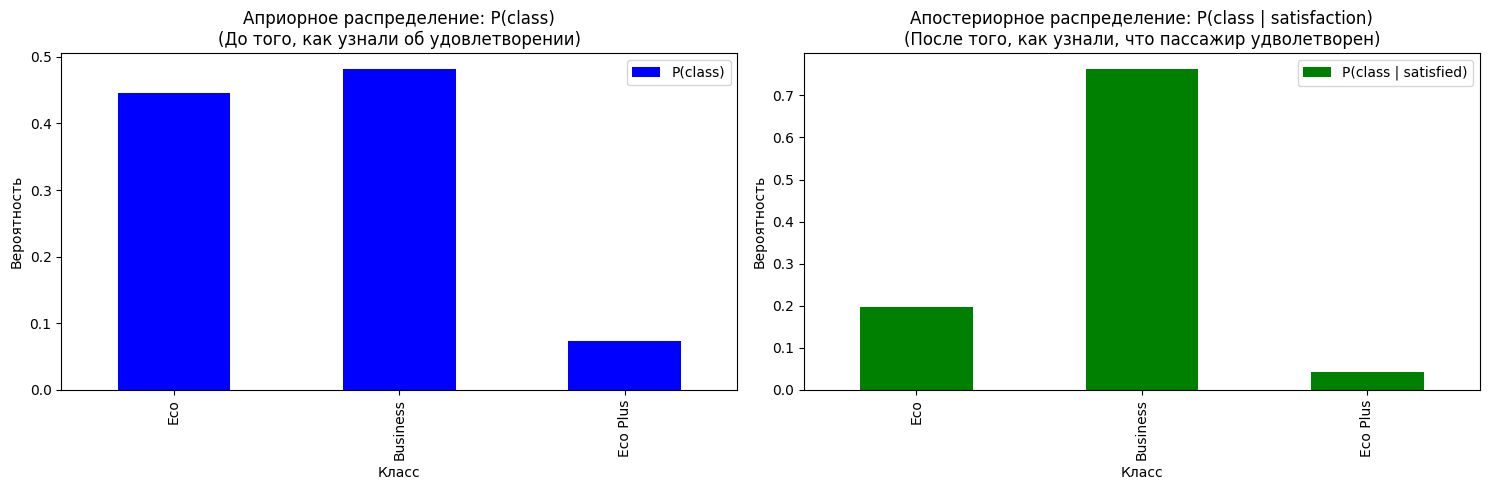

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

bayes_df.plot(x='class', y='P(class)', kind='bar', ax=ax1, color='blue')
ax1.set_title('Априорное распределение: P(class)\n(До того, как узнали об удовлетворении)')
ax1.set_ylabel('Вероятность')
ax1.set_xlabel('Класс')

bayes_df.plot(x='class', y='P(class | satisfied)', kind='bar', ax=ax2, color='green')
ax2.set_title('Апостериорное распределение: P(class | satisfaction)\n(После того, как узнали, что пассажир удволетворен)')
ax2.set_ylabel('Вероятность')
ax2.set_xlabel('Класс')

plt.tight_layout()
plt.show()